In [6]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np

Keras has two kinds of constructs that handle input data
1. `keras.Input`: A symbolic tensor that represents a placeholder for input data. It does not add any trainable weights or operations and typically used as the first layer in a Functional API model
2. `keras.layers.InputLayer`: It is an acutal keras layer sued to represent the input tensors. Often used in Sequential models.

In [7]:
# when you call a keras layer on a symbolic tensor,
# the output will be another symbolic tensor with updated shape and dtype info

inputs = keras.Input(shape=(3,), name="my_input")  #inputs is a symbolic tensor
features = keras.layers.Dense(64, activation="relu")(inputs)
outputs = keras.layers.Dense(10, activation="softmax")(features)

In [8]:
type(outputs)

keras.src.engine.keras_tensor.KerasTensor

In [9]:
# instantiate the model
model = keras.Model(inputs = inputs, outputs = outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


***Multi-input & Multi-output models***

In [10]:
# building a system to rank customer support tickets by priority and route them
# to the appropriate department

# inputs to the model:
#          The title of the ticket (text input)
#          The text body of the ticket (text input)
#          Tags added by the user (categorical input, assumed here to be one-hot encoded)

# outputs of the model:
#           The priority score of the ticket, a scalar between 0 and 1
#           The department that should handle the ticket (a softmax over the set of departments)

In [11]:
vocabulary_size = 10000
num_tags = 50
num_departments = 5

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = keras.layers.Concatenate()([title, text_body, tags])
features = keras.layers.Dense(64, activation="relu")(features)

priority = keras.layers.Dense(1, activation="sigmoid", name="priority")(features)
department = keras.layers.Dense(num_departments, activation="softmax", name="department")(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

`keras.layers.Concatenate()`: The layer combines the outputs of multiple layers into a single tensor.

Input: Takes a list of tensors as input, all of which must have the same shape except for the concatenation axis.

Concatenation: Joins the input tensors along a specified axis (by default, the last axis).

Output: Returns a single tensor that is the result of concatenating the input tensors.


In [12]:
import numpy as np
num_samples = 1280

# create dummy data
title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

# create dummy targets
priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

# compile, fit and evaluate the model
model.compile(optimizer="rmsprop",
 loss=["mean_squared_error", "categorical_crossentropy"],
 metrics=[["mean_absolute_error"], ["accuracy"]])

model.fit([title_data, text_body_data, tags_data],
 [priority_data, department_data],
 epochs=1)

model.evaluate([title_data, text_body_data, tags_data],
 [priority_data, department_data])

priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 1s 12ms/step


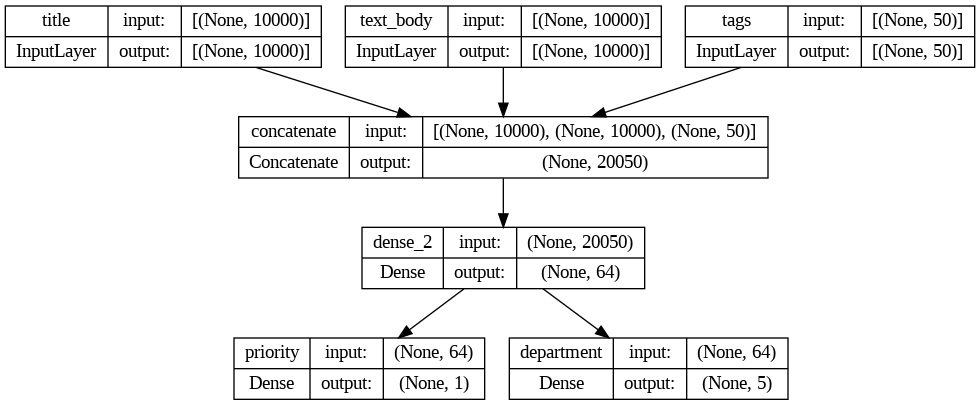

In [14]:
# lets vizualize the topology of the neural network we created
keras.utils.plot_model(model, "ticket_classifier.png", show_shapes = True)

The best thing about functional API is that it allows us to do feature extraction. We can use features of previous functional models to create new models without having to build a model from scratch

This can be achieved as follows:

In [17]:
model.layers

In [32]:
features = model.layers[4].output

In [35]:
# adding a new output to the model - time taken to solve a ticket(classified into 3 different time periods)
time = keras.layers.Dense(3, activation = "softmax", name = "time")(features)

model2 = keras.Model(inputs=[title, text_body, tags],
                     outputs=[priority, department, time])

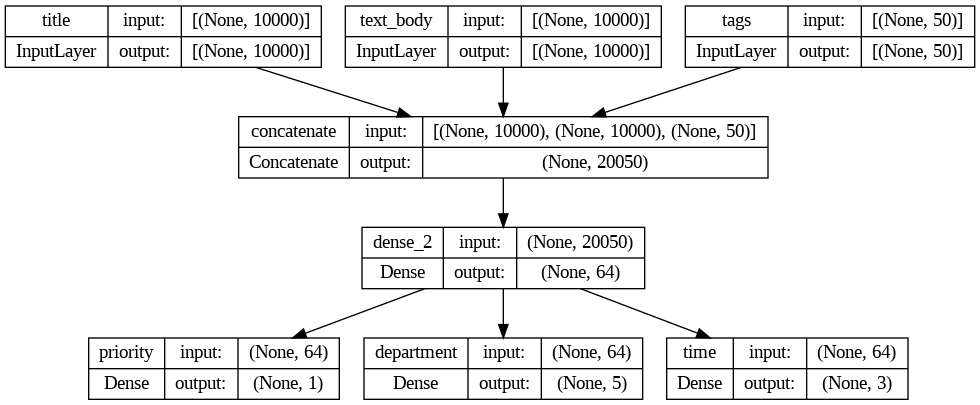

In [36]:
keras.utils.plot_model(model2, "updated_ticket_classifier.png", show_shapes=True)